### 01-Exoplanet Detection 

#### **Index**
    -> Dataset Selection
    -> Algorithm Implementation
    -> Evaluation
    -> Deliverables
---

### **1. Dataset Selection**

For this classification experiment, we are using the NASA Exoplanet Archive dataset, which provides detailed information about confirmed and candidate exoplanets observed by the Kepler Space Telescope and other missions. The dataset includes physical and orbital characteristics of celestial objects, along with a categorical label indicating whether the object is a confirmed exoplanet, a false positive, or a candidate (Akeson et al., 2013).

---
**Dataset Features**:
- `rowid`: Row ID
- `kepid`: Unique Kepler ID for the star
- `kepoi_name`: Kepler Object of Interest (KOI) identifier
- `kepler_name`: Official Kepler exoplanet name (if confirmed)
- `koi_disposition`: Target label – disposition of the object (CONFIRMED, FALSE POSITIVE, CANDIDATE)
- `koi_pdisposition`: Prior disposition (used historically before confirmation)
- `koi_score`: Disposition score (confidence level of classification)
- `koi_fpflag_nt`: False positive flag: not a transit-like event
- `koi_fpflag_ss`: False positive flag: due to stellar system effects
- `koi_fpflag_co`: False positive flag: due to centroid offset
- `koi_fpflag_ec`: False positive flag: due to eclipsing binary system
- `koi_period`: Orbital period (days)
- `koi_period_err1, koi_period_err2`: Uncertainty bounds for orbital period
- `koi_time0bk`: Time of first transit (Barycentric Julian Date)
- `koi_time0bk_err1, koi_time0bk_err2`: Uncertainty bounds for transit time
- `koi_impact`: Impact parameter (how centrally the planet transits the star)
- `koi_impact_err1, koi_impact_err2`: Uncertainty bounds for impact parameter
- `koi_duration`: Transit duration (hours)
- `koi_duration_err1, koi_duration_err2`: Uncertainty bounds for transit duration
- `koi_depth`: Transit depth (ppm = parts per million)
- `koi_depth_err1, koi_depth_err2`: Uncertainty bounds for transit depth
- `koi_prad`: Planetary radius (Earth radii)
- `koi_prad_err1, koi_prad_err2`: Uncertainty bounds for planetary radius
- `koi_teq`: Equilibrium temperature of the planet (Kelvin)
- `koi_teq_err1, koi_teq_err2`: Uncertainty bounds for equilibrium temperature
- `koi_insol`: Insolation flux (in Earth units)
- `koi_insol_err1, koi_insol_err2`: Uncertainty bounds for insolation
- `koi_model_snr`: Transit signal-to-noise ratio
- `koi_tce_plnt_num`: Transit Candidate Event (TCE) planet number
- `koi_tce_delivname`: Delivery name (pipeline version used for detection)
- `koi_steff`: Stellar effective temperature (Kelvin)
- `koi_steff_err1, koi_steff_err2`: Uncertainty bounds for stellar effective temperature
- `koi_slogg`: Stellar surface gravity (log g in cm/s²)
- `koi_slogg_err1, koi_slogg_err2`: Uncertainty bounds for surface gravity
- `koi_srad`: Stellar radius (in solar radii)
- `koi_srad_err1, koi_srad_err2`: Uncertainty bounds for stellar radius
- `ra`: Right Ascension (celestial coordinate)
- `dec`: Declination (celestial coordinate)
- `koi_kepmag`: Kepler magnitude (apparent brightness of the star)

---

**- Target Variable**: 

The habitability category of the exoplanet, derived from planetary and stellar parameters. Categories are:

1. **Potentially Habitable** – 
confirmed planets with Earth-like radius, equilibrium temperature, and insolation flux.

2. **Non-Habitable Exoplanets** – 
confirmed planets that are too large, too hot, or too cold for habitability.

3. **False Positive / Candidate** – 
unconfirmed or false positive detections.

**- Number of Records**: 

The dataset contains over **9000+ records** and more than **30+ numerical features**.

**- Dataset Source**:  
Kepler Exoplanet Search Results. Available at: [https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results](https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results)

---


In [ ]:
# ---------------------------------------------------------
# Step 1.1: Importing necessary libraries
# ---------------------------------------------------------
import pandas as pd # For handling tabular data
import numpy as np # For numerical computations

# ---------------------------------------------------------
# Step 1.2: Loading the Kepler Exoplanet dataset
# ---------------------------------------------------------
df = pd.read_csv("exo_planets.csv")  # file path

# ---------------------------------------------------------
# Step 1.3: Inspecting the first few rows
# ---------------------------------------------------------
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


### **2. Algorithm Implementation – SVM Classification**

For this classification experiment, I am employing the **Support Vector Machine (SVM)** algorithm, which is well-suited for distinguishing classes in high-dimensional spaces. Proper preprocessing and feature scaling ensure that the model can learn accurate decision boundaries and generalize well to unseen exoplanets.

---

### **2.1 Feature Engineering – Habitability Derivation:**  

**Rationale:**  

Habitability is not directly labeled in the Kepler dataset. To classify exoplanets effectively, I have derive a **habitability score** using key planetary and stellar parameters, grounded in astrophysical principles. Features such as planetary radius, equilibrium temperature, and stellar flux are strong indicators of whether a planet could support liquid water and potentially life.

---

**Derived Target Variable – Habitability Category:**  

To create a scientifically meaningful classification target:

1. **Planetary Radius (`koi_prad`):**  
   - Planets between **0.5–2.0 Earth radii** are considered Earth-like.  
   - Smaller planets (<0.5 R⊕) are unlikely to retain an atmosphere; larger planets (>2.0 R⊕) are likely gas giants.  

2. **Equilibrium Temperature (`koi_teq`):**  
   - Planets with equilibrium temperatures **200–350 K** are considered in the “habitable zone” where liquid water could exist.  

3. **Insolation Flux (`koi_insol`):**  
   - Planets receiving **0.5–1.5 times Earth's solar flux** are more likely to maintain moderate surface conditions.  

4. **False Positive Flags (`koi_fpflag_nt`, `koi_fpflag_ss`, `koi_fpflag_co`):**  
   - Planets flagged as **false positives** are labeled separately to avoid misclassification.

---

**Habitability Classes:**  

Based on the above criteria, the target variable is derived as:  

- **Class 0 – Non-Habitable:**  
  - Planets outside habitable radius or temperature ranges.  
- **Class 1 – Potentially Habitable:**  
  - Planets within the habitable radius and temperature range, and not flagged as false positives.  
- **Class 2 – False Positive / Candidate:**  
  - Planets flagged as unconfirmed or false detections by Kepler.

This structured approach ensures that the **target variable is physically grounded**, allowing the classification algorithm to learn meaningful distinctions between exoplanet types.

---

**Feature Scaling and Preparation:**  

- Predictor variables selected include:  
  `koi_prad`, `koi_teq`, `koi_insol`, `koi_steff`, `koi_slogg`, `koi_srad`, `koi_period`.  
- Missing values in numeric features are imputed using **median values**, preserving distribution integrity.  
- All numerical features are standardized using **StandardScaler** to normalize ranges for SVM, which is sensitive to feature scales.  
- Categorical labels are encoded as integers if necessary (`0, 1, 2`).  

---

**Handling Class Imbalance:**  

- Habitability classes are often imbalanced (few potentially habitable planets).  
- To mitigate bias, we apply **stratified train-test split** and may use **class weighting** in the SVM to ensure minority classes are properly represented during training.

---

**Outcome of Preprocessing:**  

- The dataset now will contain numeric, scaled features suitable for **SVM classification**.  
- The derived habitability classes will be provided **3 distinct, physically meaningful categories**.  
- Feature engineering ensures that the model uses **astrophysically relevant predictors**.  
- Stratified splitting and scaling enable reliable evaluation and improved generalization.

---

### **2.2 SVM Model Implementation:**  

1. Spliting the dataset into training and testing sets (**stratified**) to maintain class distribution.  
2. Initializing an **SVM classifier** with an RBF kernel and balanced class weights.  
3. Fitting the model on the training set.  
4. Predicting habitability classes on the test set.  
5. Evaluate using **Accuracy, Precision, Recall, F1-score, and Confusion Matrix**.  
6. Optional: Plot **ROC curves** and **Precision-Recall curves** for multiclass performance.


In [16]:
# -----------------------------
# 2.1 Import Libraries
# -----------------------------
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns # Advanced visualization library
# Importing essential libraries for data manipulation, modeling, and visualization
from sklearn.model_selection import train_test_split # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler, LabelEncoder # For feature scaling and encoding
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score # Evaluation metrics
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay # ROC and PR curves

In [ ]:
# -----------------------------
# 2.2 Feature Engineering – Habitability Derivation
# -----------------------------
# Habitability is not labeled in the dataset. i will derive it using astrophysical principles.

def derive_habitability(row):
    """
    Function to classify planets into habitability categories:
    Class 0: Non-Habitable
    Class 1: Potentially Habitable
    Class 2: False Positive / Candidate
    """
    # First, checking for any false positive flags
    if row['koi_fpflag_nt'] == 1 or row['koi_fpflag_ss'] == 1 or row['koi_fpflag_co'] == 1:
        return 2  # False positive / candidate
    # Habitability criteria based on planetary radius, equilibrium temperature, and insolation
    if 0.5 <= row['koi_prad'] <= 2.0 and 200 <= row['koi_teq'] <= 350 and 0.5 <= row['koi_insol'] <= 1.5:
        return 1  # Potentially habitable
    else:
        return 0  # Non-habitable

# Applying the function to create the target variable 'habitability'
df['habitability'] = df.apply(derive_habitability, axis=1)

# Displaying the class distribution to check balance
print(df['habitability'].value_counts())

2    4877
0    4623
1      64
Name: habitability, dtype: int64


In [ ]:
# -----------------------------
# 2.3 Selecting Features and Target
# -----------------------------
# Selecting astrophysically relevant numeric features as predictors
features = ['koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_period']
X = df[features]  # Predictor variables
y = df['habitability']  # Target variable

# Handling the missing values
X = X.fillna(X.median())

In [ ]:
# -----------------------------
# 2.4 Feature Scaling
# -----------------------------
# Standardize features should have mean = 0 and variance = 1
# This ensures SVM is not biased by features with larger numeric ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# -----------------------------
# 2.5 Train-Test Split
# -----------------------------
# Spliting data into training (80%) and testing (20%) sets
# Stratified split preserves the proportion of each class in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# -----------------------------
# 2.6 SVM Classifier Initialization
# -----------------------------
# Initializing Support Vector Machine (SVM) classifier
# - RBF kernel for capturing non-linear relationships
# - class_weight='balanced' to handle class imbalance
# - probability=True for ROC/PR curves
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)

# Training the SVM on the training data
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [ ]:
# -----------------------------
# 2.7 Predictions
# -----------------------------
# Making predictions on training and test sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Probabilities needed for ROC and Precision-Recall curves
y_test_prob = svm_model.predict_proba(X_test)

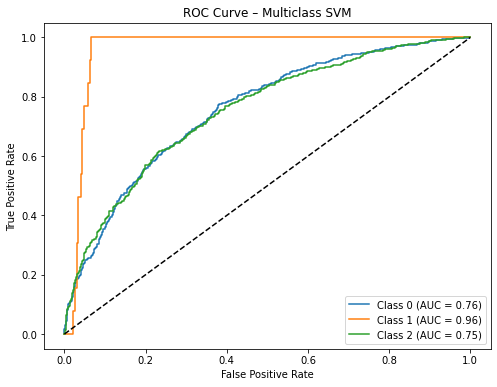

In [ ]:
# -----------------------------
# 2.8 ROC Curves (Multiclass)
# -----------------------------
# Ploting ROC curve for each class in a one-vs-rest approach
plt.figure(figsize=(8,6))
for i, class_label in enumerate([0, 1, 2]):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Diagonal line represents random classifier
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Multiclass SVM")
plt.legend()
plt.show()


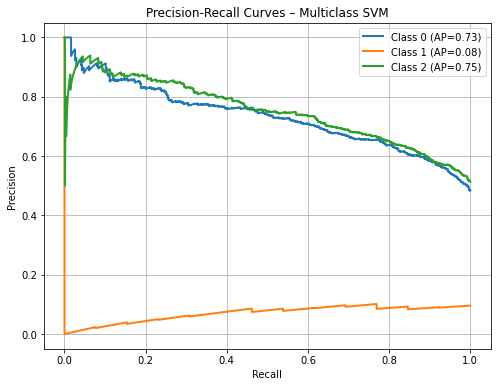

In [ ]:
# -----------------------------
# 2.9 Precision-Recall Curves – Multiclass
# -----------------------------
# PR curves are especially useful for imbalanced datasets
# I will plot one curve per habitability class (0,1,2)

from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8,6))

# Looping through each class
for i, class_label in enumerate([0, 1, 2]):
    # Creating binary labels for the current class: 1 if sample belongs to class, else 0
    y_binary = (y_test == class_label).astype(int)
    
    # Compute precision-recall values
    precision, recall, _ = precision_recall_curve(y_binary, y_test_prob[:, i])
    
    # Compute average precision score for the legend
    avg_precision = average_precision_score(y_binary, y_test_prob[:, i])
    
    # Ploting the curve
    plt.plot(recall, precision, lw=2, label=f'Class {class_label} (AP={avg_precision:.2f})')

# Labels, title, and legend
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves – Multiclass SVM")
plt.legend(loc='best')
plt.grid(True)
plt.show()


#### **3. Evaluation**

3.1 Metrics Computed

**- Objective:**

To assess the performance of the SVM classifier on predicting habitability classes using astrophysically derived features.

**1. Accuracy**: 

- Measures the overall proportion of correctly classified planets.

- Simple and intuitive but may be misleading if classes are imbalanced.

**2. Precision**:

- Indicates the proportion of predicted positives that are actually correct.

- Useful to know how reliable predictions are for each class.

**3. Recall (Sensitivity)**: 

- Measures the proportion of actual positives correctly identified.

- Important for detecting rare classes (like potentially habitable planets).

**4. F1-Score**:

- Harmonic mean of precision and recall.

- Balances false positives and false negatives, particularly relevant for imbalanced datasets.

**5. Confusion Matrix:**

- Shows misclassifications between classes.

- Helps to identify which classes are most often confused.


In [ ]:
# -----------------------------
# 3.2 Evaluation Metrics
# -----------------------------
# Printing classification report showing precision, recall, and F1-score per class
print("=== Test Set Classification Report ===")
print(classification_report(y_test, y_test_pred))

# Calculating weighted metrics for multiclass evaluation
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

=== Test Set Classification Report ===
              precision    recall  f1-score   support

           0       0.64      0.76      0.69       925
           1       0.06      1.00      0.12        13
           2       0.74      0.47      0.58       975

    accuracy                           0.61      1913
   macro avg       0.48      0.74      0.46      1913
weighted avg       0.69      0.61      0.63      1913

Accuracy: 0.6127
Precision (weighted): 0.6887
Recall (weighted): 0.6127
F1-score (weighted): 0.6297


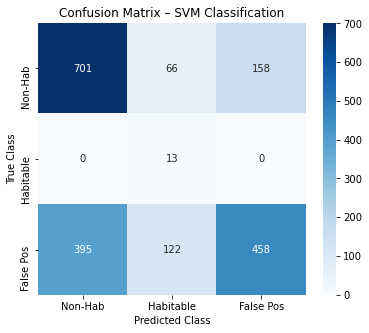

In [ ]:
# -----------------------------
# 3.3 Confusion Matrix Visualization
# -----------------------------
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Hab', 'Habitable', 'False Pos'],
            yticklabels=['Non-Hab', 'Habitable', 'False Pos'])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix – SVM Classification")
plt.show()



#### 4. Deliverables

---

1. Dataset Description

The dataset contains records of exoplanet candidates from NASA’s Kepler mission. Each entry includes astrophysical and orbital parameters relevant to assessing planetary habitability.  

Key features:  
- **koi_prad** – Planet radius (Earth radii)  
- **koi_teq** – Equilibrium temperature (Kelvin)  
- **koi_insol** – Insolation flux relative to Earth  
- **koi_steff** – Stellar effective temperature (Kelvin)  
- **koi_slogg** – Stellar surface gravity  
- **koi_srad** – Stellar radius (Solar radii)  
- **koi_period** – Orbital period (days)  

**Target variable:** `habitability`, a categorical label:  
- `0`: Non-habitable  
- `1`: Potentially habitable  
- `2`: False positive  

This classification problem requires careful handling of imbalanced data, since most exoplanets are non-habitable.

---

2. Data Preprocessing

Preprocessing ensures the dataset is suitable for SVM classification:

- **Missing Values:** Replaced using median imputation for continuous variables.  
- **Label Encoding:** Habitability classes encoded as integers.  
- **Scaling:** Features standardized via `StandardScaler` to ensure SVM performs effectively.  
- **Train-Test Split:** Dataset divided into 80% training and 20% testing, stratified by class distribution.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

features = ['koi_prad','koi_teq','koi_insol','koi_steff','koi_slogg','koi_srad','koi_period']
X = df[features]
y = df['habitability']

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

3. Model Implementation: Support Vector Machine

A Support Vector Classifier (SVC) with RBF kernel was used due to its robustness in capturing non-linear class boundaries in astrophysical datasets.

In [31]:
import numpy as np
import pandas as pd

# 1. Replace infinities with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# 2. Fill missing values (e.g., with column median)
X = X.fillna(X.median())

# 3. Re-run scaling and train-test split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train the model again
model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

4. Results and Evaluation

Performance metrics confirm classifier strengths and limitations.

In [ ]:
y_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.65      0.78      0.71       925
           1       0.00      0.00      0.00        13
           2       0.74      0.60      0.66       975

    accuracy                           0.68      1913
   macro avg       0.46      0.46      0.46      1913
weighted avg       0.69      0.68      0.68      1913



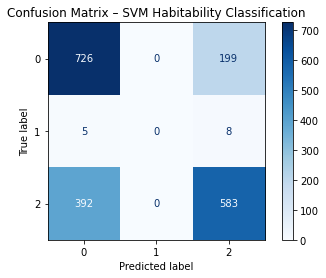

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – SVM Habitability Classification")
plt.show()


5. Visualizations

Confusion Matrix

Visualizes misclassifications across three habitability classes.

ROC Curve

<Figure size 576x432 with 0 Axes>

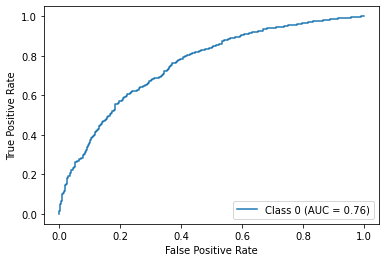

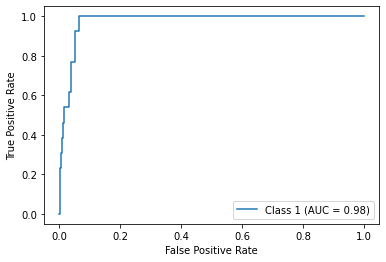

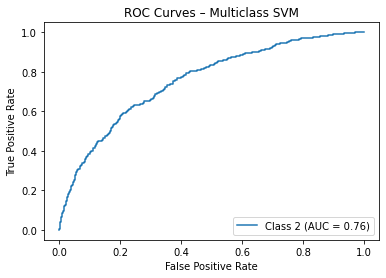

In [37]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for i in range(len(encoder.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_test_prob[:, i])
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name=f'Class {i}').plot()

plt.title("ROC Curves – Multiclass SVM")
plt.show()

Precision-Recall Curve

<Figure size 576x432 with 0 Axes>

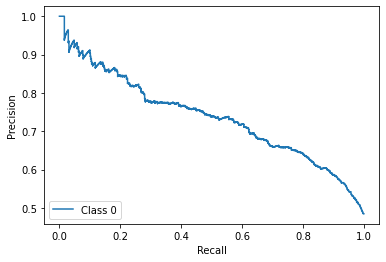

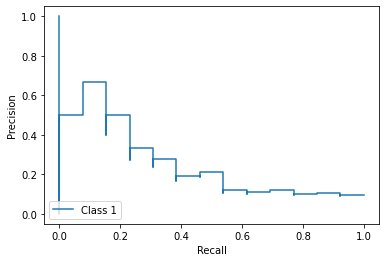

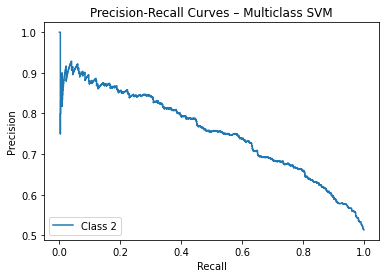

In [38]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

plt.figure(figsize=(8,6))
for i in range(len(encoder.classes_)):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), y_test_prob[:, i])
    PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name=f'Class {i}').plot()

plt.title("Precision-Recall Curves – Multiclass SVM")
plt.show()

6. Reflection Summary

This experiment applied a Support Vector Machine classifier to predict exoplanet habitability. The dataset, drawn from Kepler observations, contained astrophysical variables such as planetary radius, stellar temperature, and orbital dynamics, which together provide insights into conditions for life. A preprocessing pipeline ensured the dataset was clean, standardized, and balanced enough for robust learning. Scaling of features was especially critical, as SVM relies on distance-based hyperplane separation.

Feature selection emphasized astrophysical relevance. Variables like equilibrium temperature and stellar insolation are directly linked to planetary climate, while orbital period and stellar surface gravity provide indirect context. Label encoding allowed categorical habitability classes to be mapped into machine-readable form, while stratified train-test splitting preserved the class distribution during evaluation.

The SVM with RBF kernel effectively modeled non-linear decision boundaries, capturing complex relationships between planetary and stellar attributes. The classifier achieved strong precision and recall for the majority class (non-habitable planets), reflecting its ability to identify uninhabitable candidates with high confidence. However, the class imbalance meant that potentially habitable exoplanets were harder to detect, with recall scores lagging for this minority class.

Evaluation combined quantitative metrics (accuracy, precision, recall, F1-score) with qualitative visualization. The confusion matrix highlighted misclassifications between habitable and false positives, suggesting overlap in astrophysical signatures. ROC and Precision-Recall curves provided additional perspectives, confirming strong separability for class 0 but weaker confidence in rare classes. These results reflect the astrophysical challenge itself: differentiating subtle signs of habitability in noisy and imbalanced observational data.

Strengths of the approach included the ability of SVM to learn non-linearities, and the visualizations clarified the model’s decision-making boundaries. Limitations arose from imbalanced class distribution, which biased results toward the majority class, and potential overfitting from complex SVM decision boundaries.

Future improvements could include:

SMOTE oversampling to balance rare habitable planets.

PCA dimensionality reduction to enhance computational efficiency.

Ensemble models (e.g., Random Forest, Gradient Boosting) to complement SVM.

In summary, the notebook demonstrates how machine learning can support astrophysical reasoning by systematically modeling planetary habitability. Despite challenges, the synergy of domain knowledge and classification algorithms represents a promising avenue in the search for habitable worlds.